# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = "/content/drive/MyDrive/0.Latest_DS_Course/Assignments/LinearRegression/Assignment1/insurance.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [4]:
df = pd.read_csv(data_path)
df.head()


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
# convert smokers sex into 0 1
df["smoker"].replace({"yes":1,"no":0},inplace=True)
df["sex"].replace({"male":1,"female":0},inplace=True)

<ipython-input-10-d30dbcbe2a54>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace({"yes":1,"no":0},inplace=True)
<ipython-input-10-d30dbcbe2a54>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"].replace({"yes":1,"no":0},inplace=True)
<ipython-input-10-d30dbcbe2a54>:3:

In [11]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the data
df['region'] = label_encoder.fit_transform(df['region'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
# region_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))


{'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [13]:
df.select_dtypes(include='number').describe()


age          sex          bmi     children       smoker  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean     39.222139     0.504862    30.663452     1.095737     0.204936   
std      14.044333     0.500163     6.100468     1.205571     0.403806   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.290000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1337.000000   1337.000000  
mean      1.516081  13279.121487  
std       1.105208  12110.359656  
min       0.000000   1121.873900  
25%       1.000000   4746.344000  
50%       2.000000   9386.161300  
75%       2.000000  16657.717450  
max       3.000000  63770.428010

## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


#Univariate - Numerical Columns

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, column):
    """Creates a side-by-side histogram and boxplot for a given column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    print(df[column].describe())



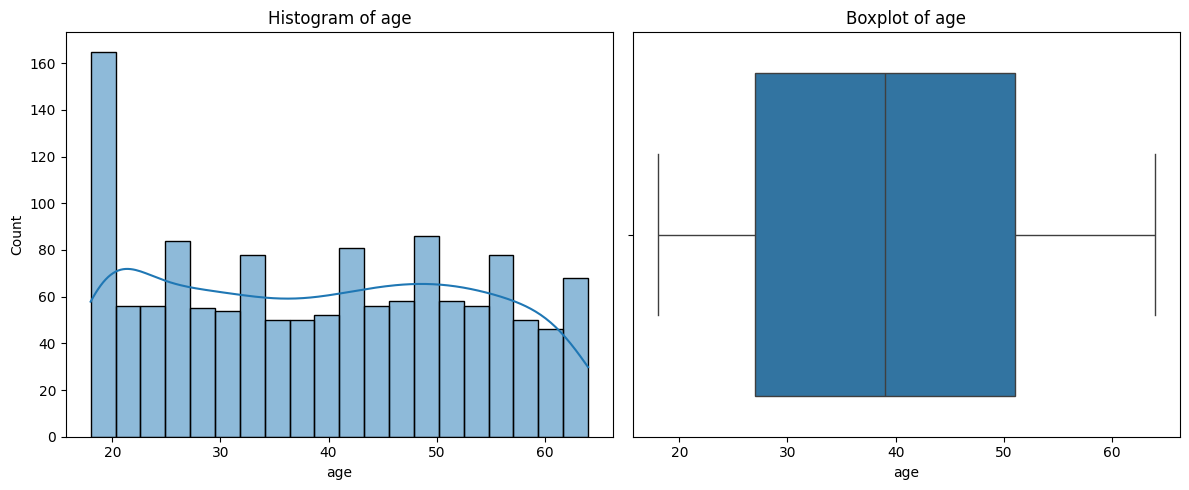

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


In [15]:
histogram_boxplot(df,"age")

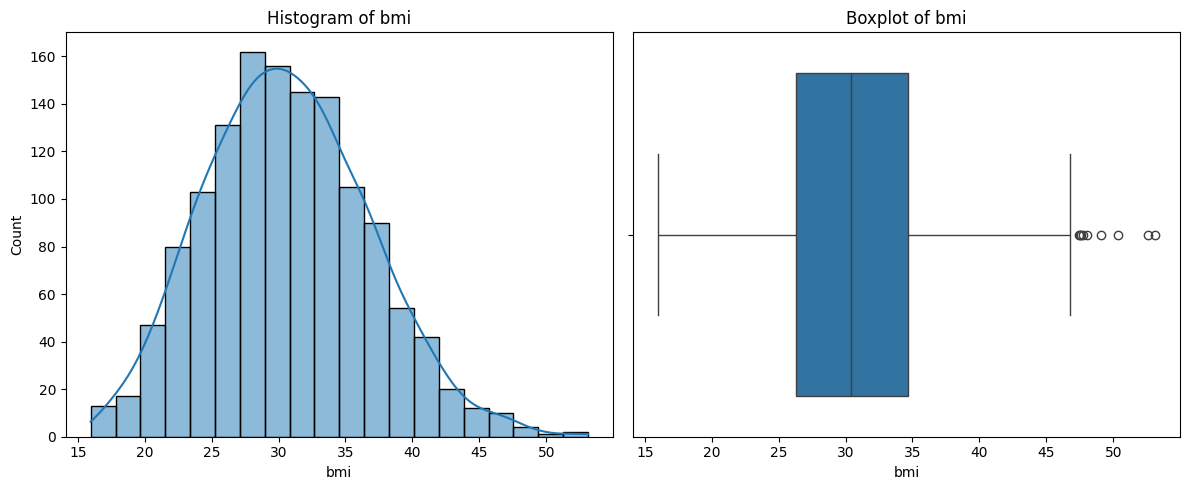

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


In [16]:
histogram_boxplot(df,"bmi")

#Univariage - Categorical Columns

In [17]:
def analyze_categorical_column(df, column_name):
    """
    Performs univariate analysis on a categorical column.
    - Displays a countplot
    - Prints value counts as percentage
    """
    # Count Plot
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')
    plt.title(f'Count Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Value Counts as Percentage
    value_percent = df[column_name].value_counts(normalize=True) * 100
    print(f"\nPercentage distribution of '{column_name}':")
    print(value_percent.round(2).astype(str) + ' %')

<ipython-input-17-268e0e6e3b24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')


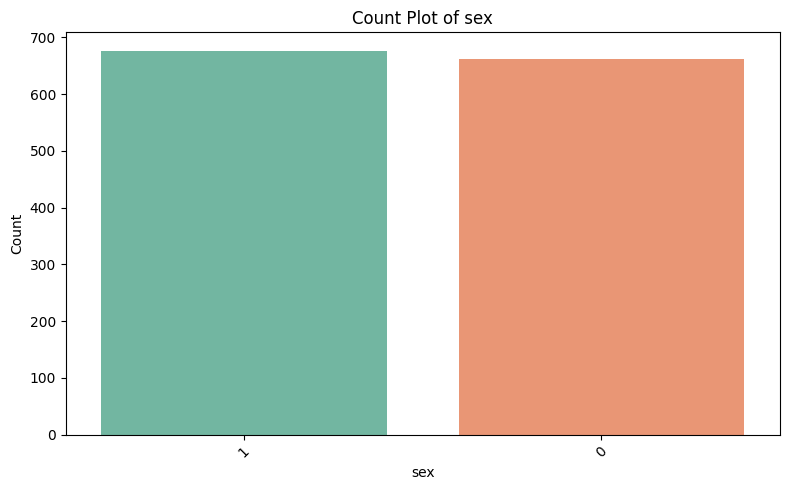


Percentage distribution of 'sex':
sex
1    50.49 %
0    49.51 %
Name: proportion, dtype: object


In [18]:
analyze_categorical_column(df, 'sex')


<ipython-input-17-268e0e6e3b24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')


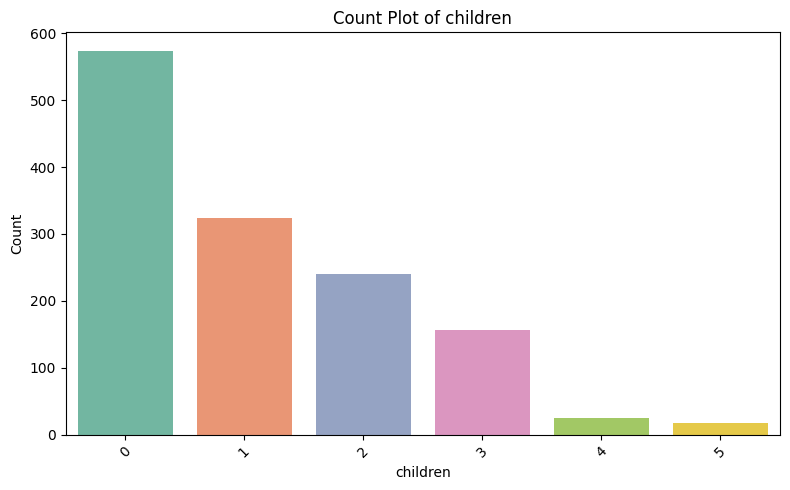


Percentage distribution of 'children':
children
0    42.86 %
1    24.23 %
2    17.95 %
3    11.74 %
4     1.87 %
5     1.35 %
Name: proportion, dtype: object


In [19]:
analyze_categorical_column(df, 'children')


<ipython-input-17-268e0e6e3b24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')


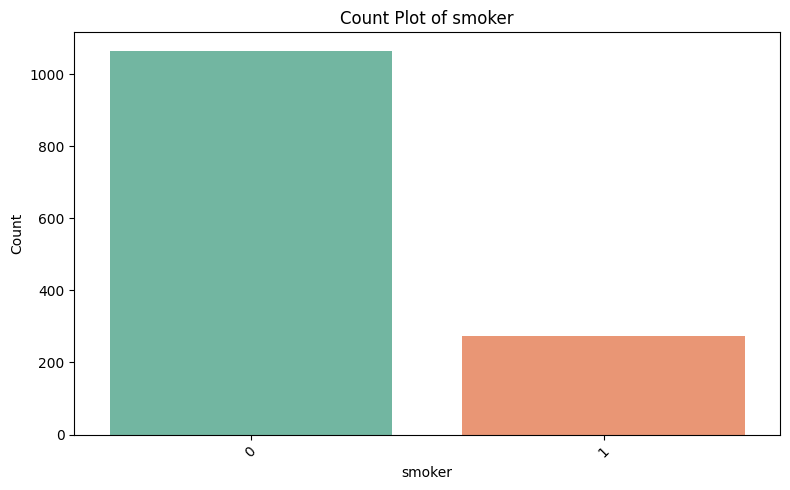


Percentage distribution of 'smoker':
smoker
0    79.51 %
1    20.49 %
Name: proportion, dtype: object


In [20]:
analyze_categorical_column(df, 'smoker')


<ipython-input-17-268e0e6e3b24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')


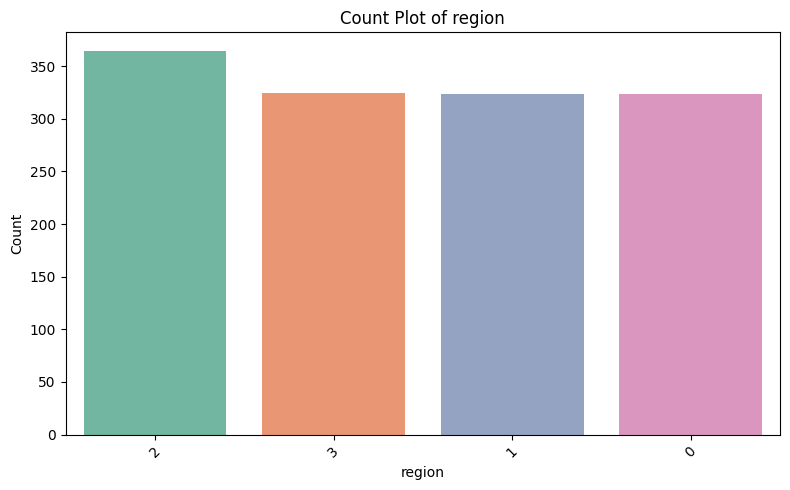


Percentage distribution of 'region':
region
2    27.23 %
3    24.31 %
1    24.23 %
0    24.23 %
Name: proportion, dtype: object


In [21]:
analyze_categorical_column(df, 'region')


### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

#Bivariate - Numerical Vs Numerical

In [22]:


def plot_boxplot(df, column, target='charges'):
    """
    Creates a Scatter for a numerical column against the target column.

    Parameters:
        df (pd.DataFrame): The dataset.
        column (str): The numerical column to plot.
        target (str): The numerical
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[target], y=df[column])
    plt.title(f"Scatterplot of {column} vs {target}")
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()



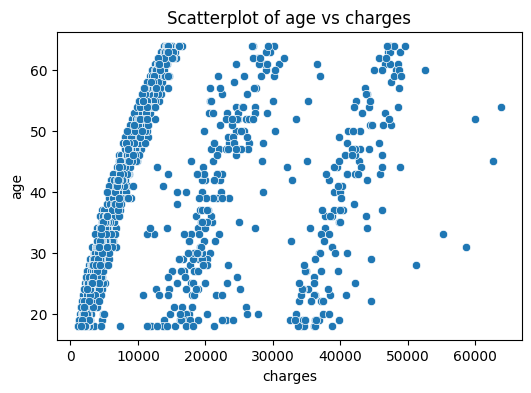

In [23]:
plot_boxplot(df, "age")

Age is directly correlated to chareges however,there seems to be three bands , we need to dig further to understand what is the reason for these bands.

*Generally, In the insurance dataset, charges is often driven heavily by whether someone is a smoker or not, and how many children they have.

* Non-smokers tend to have relatively lower charges.

* Smokers have drastically higher charges (even at similar ages or BMIs).



## Try coloring (hue) the plot by smoker to verify:

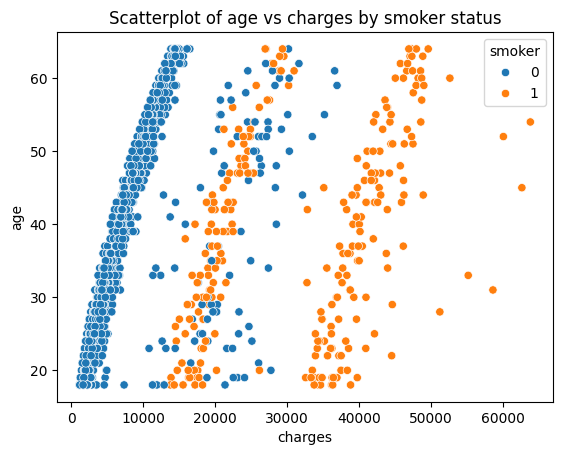

In [24]:
sns.scatterplot(data=df, x='charges', y='age', hue='smoker')
plt.title('Scatterplot of age vs charges by smoker status')
plt.show()

* Clearly now we understand that why there are three bands in the scatter, smokers seems to be paying high charges which makes a lot of sense

* however , the bule points in the second band are stil a mestry

<Axes: xlabel='charges', ylabel='age'>

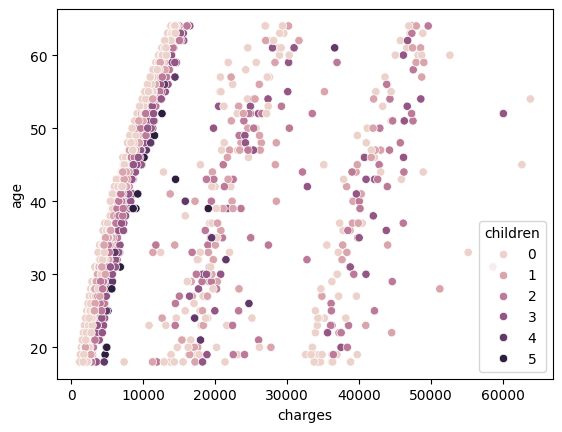

In [25]:
sns.scatterplot(data=df, x='charges', y='age', hue='children')


* some of the unexplained blue points in the second band sseems to be families with 3 and 3+ children


<Axes: xlabel='charges', ylabel='age'>

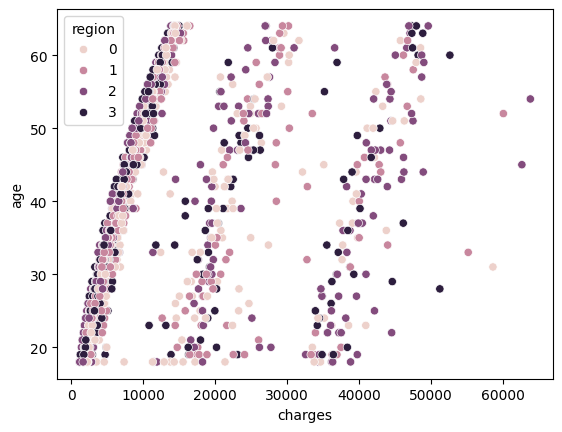

In [26]:
sns.scatterplot(data=df, x='charges', y='age', hue='region')


In [27]:
# df['region_name'] = df['region'].map(region_mapping)

# # 2. Filter for non-smokers
# non_smokers = df[df['smoker'] == 0]

# # 3. Group by region and compute average charges
# region_charge_stats = non_smokers.groupby('region_name')['charges'].agg(['mean', 'median', 'count']).reset_index()

# print(region_charge_stats)

# # 4. Optional: Plot the average charges for non-smokers by region
# plt.figure(figsize=(8,5))
# sns.barplot(x='region_name', y='mean', data=region_charge_stats)
# plt.title('Average Charges by Region (Non-Smokers)')
# plt.ylabel('Average Charges')
# plt.xlabel('Region')
# plt.show()

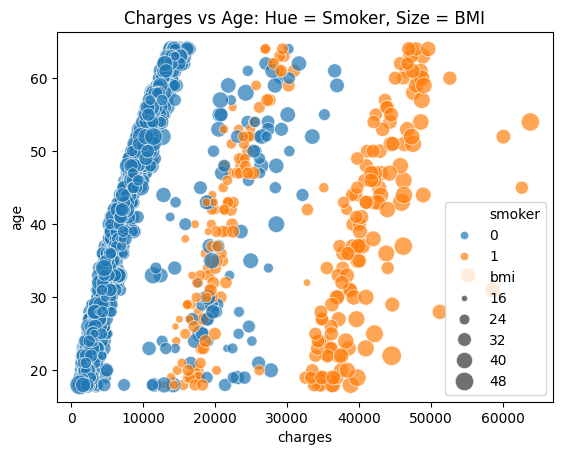

In [28]:
sns.scatterplot(data=df, x='charges', y='age', hue='smoker', size='bmi', sizes=(20, 200), alpha=0.7)
plt.title('Charges vs Age: Hue = Smoker, Size = BMI')
plt.show()


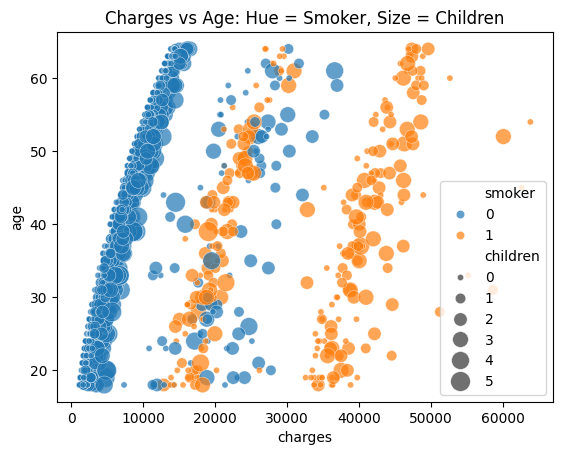

In [29]:
sns.scatterplot(data=df, x='charges', y='age', hue='smoker', size='children', sizes=(20, 200), alpha=0.7)
plt.title('Charges vs Age: Hue = Smoker, Size = Children')
plt.show()


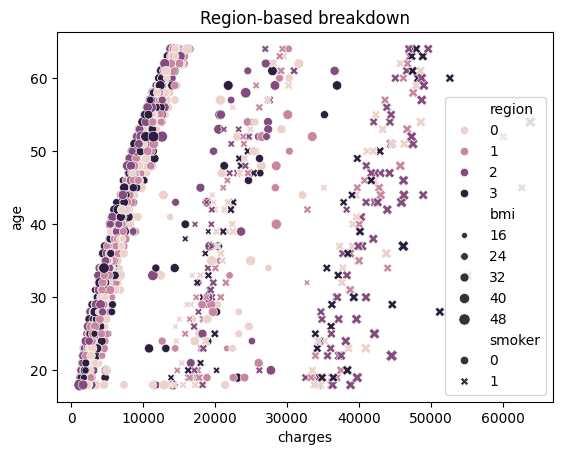

In [30]:
sns.scatterplot(data=df, x='charges', y='age', hue='region', style='smoker', size='bmi')
plt.title("Region-based breakdown")
plt.show()

##the markers high in the second band which were not explained by smokers param are the ppl with high bmi who are paying high charges

In [31]:
df['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1337, dtype: int64

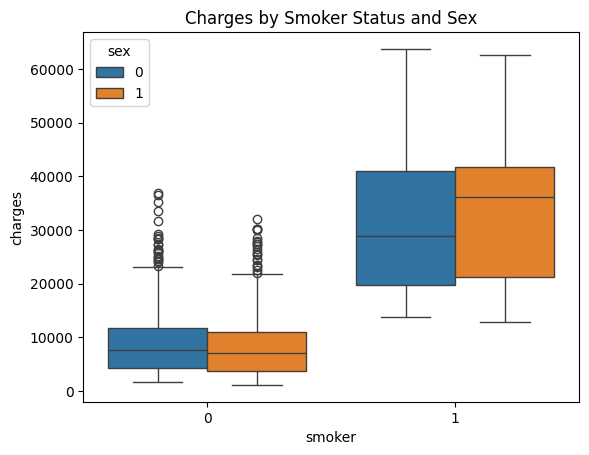

In [32]:
sns.boxplot(data=df, x='smoker', y='charges', hue='sex')
plt.title('Charges by Smoker Status and Sex')
plt.show()


* Clearly smokers are paying higher charges


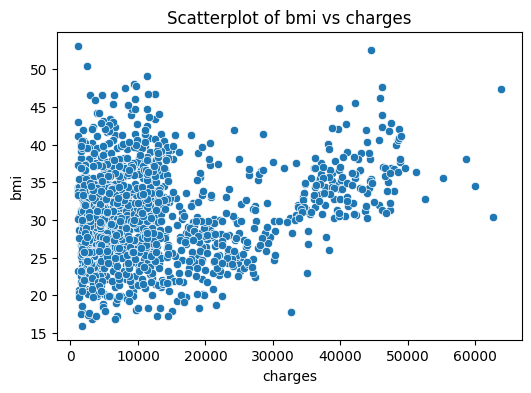

In [33]:
plot_boxplot(df, "bmi")

<Axes: xlabel='charges', ylabel='bmi'>

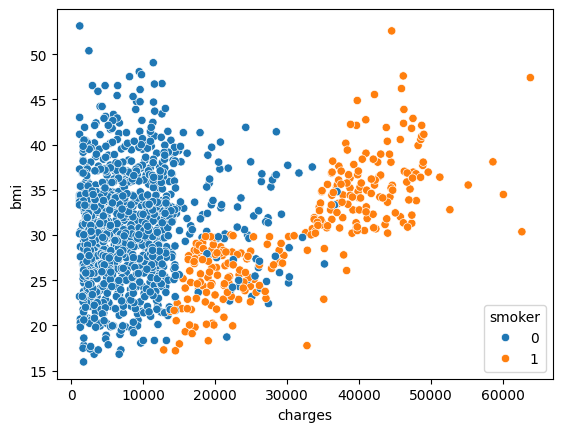

In [34]:
sns.scatterplot(data=df, x="charges", y="bmi", hue="smoker")

<Axes: xlabel='charges', ylabel='bmi'>

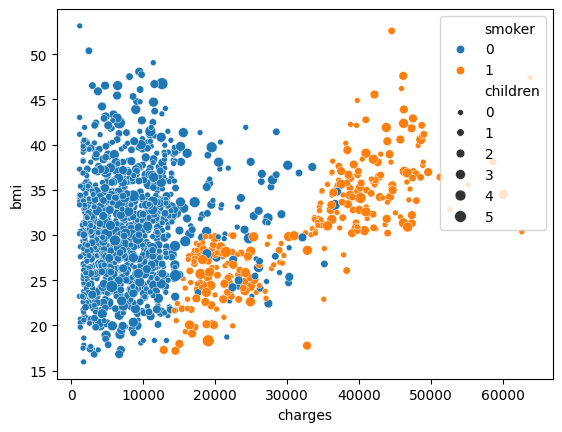

In [35]:
sns.scatterplot(data=df, x="charges", y="bmi", hue="smoker", size="children")

* smokers pay higher
* some ppl with high age are still on the top left : these are the ppl with 0 children and non-smokers

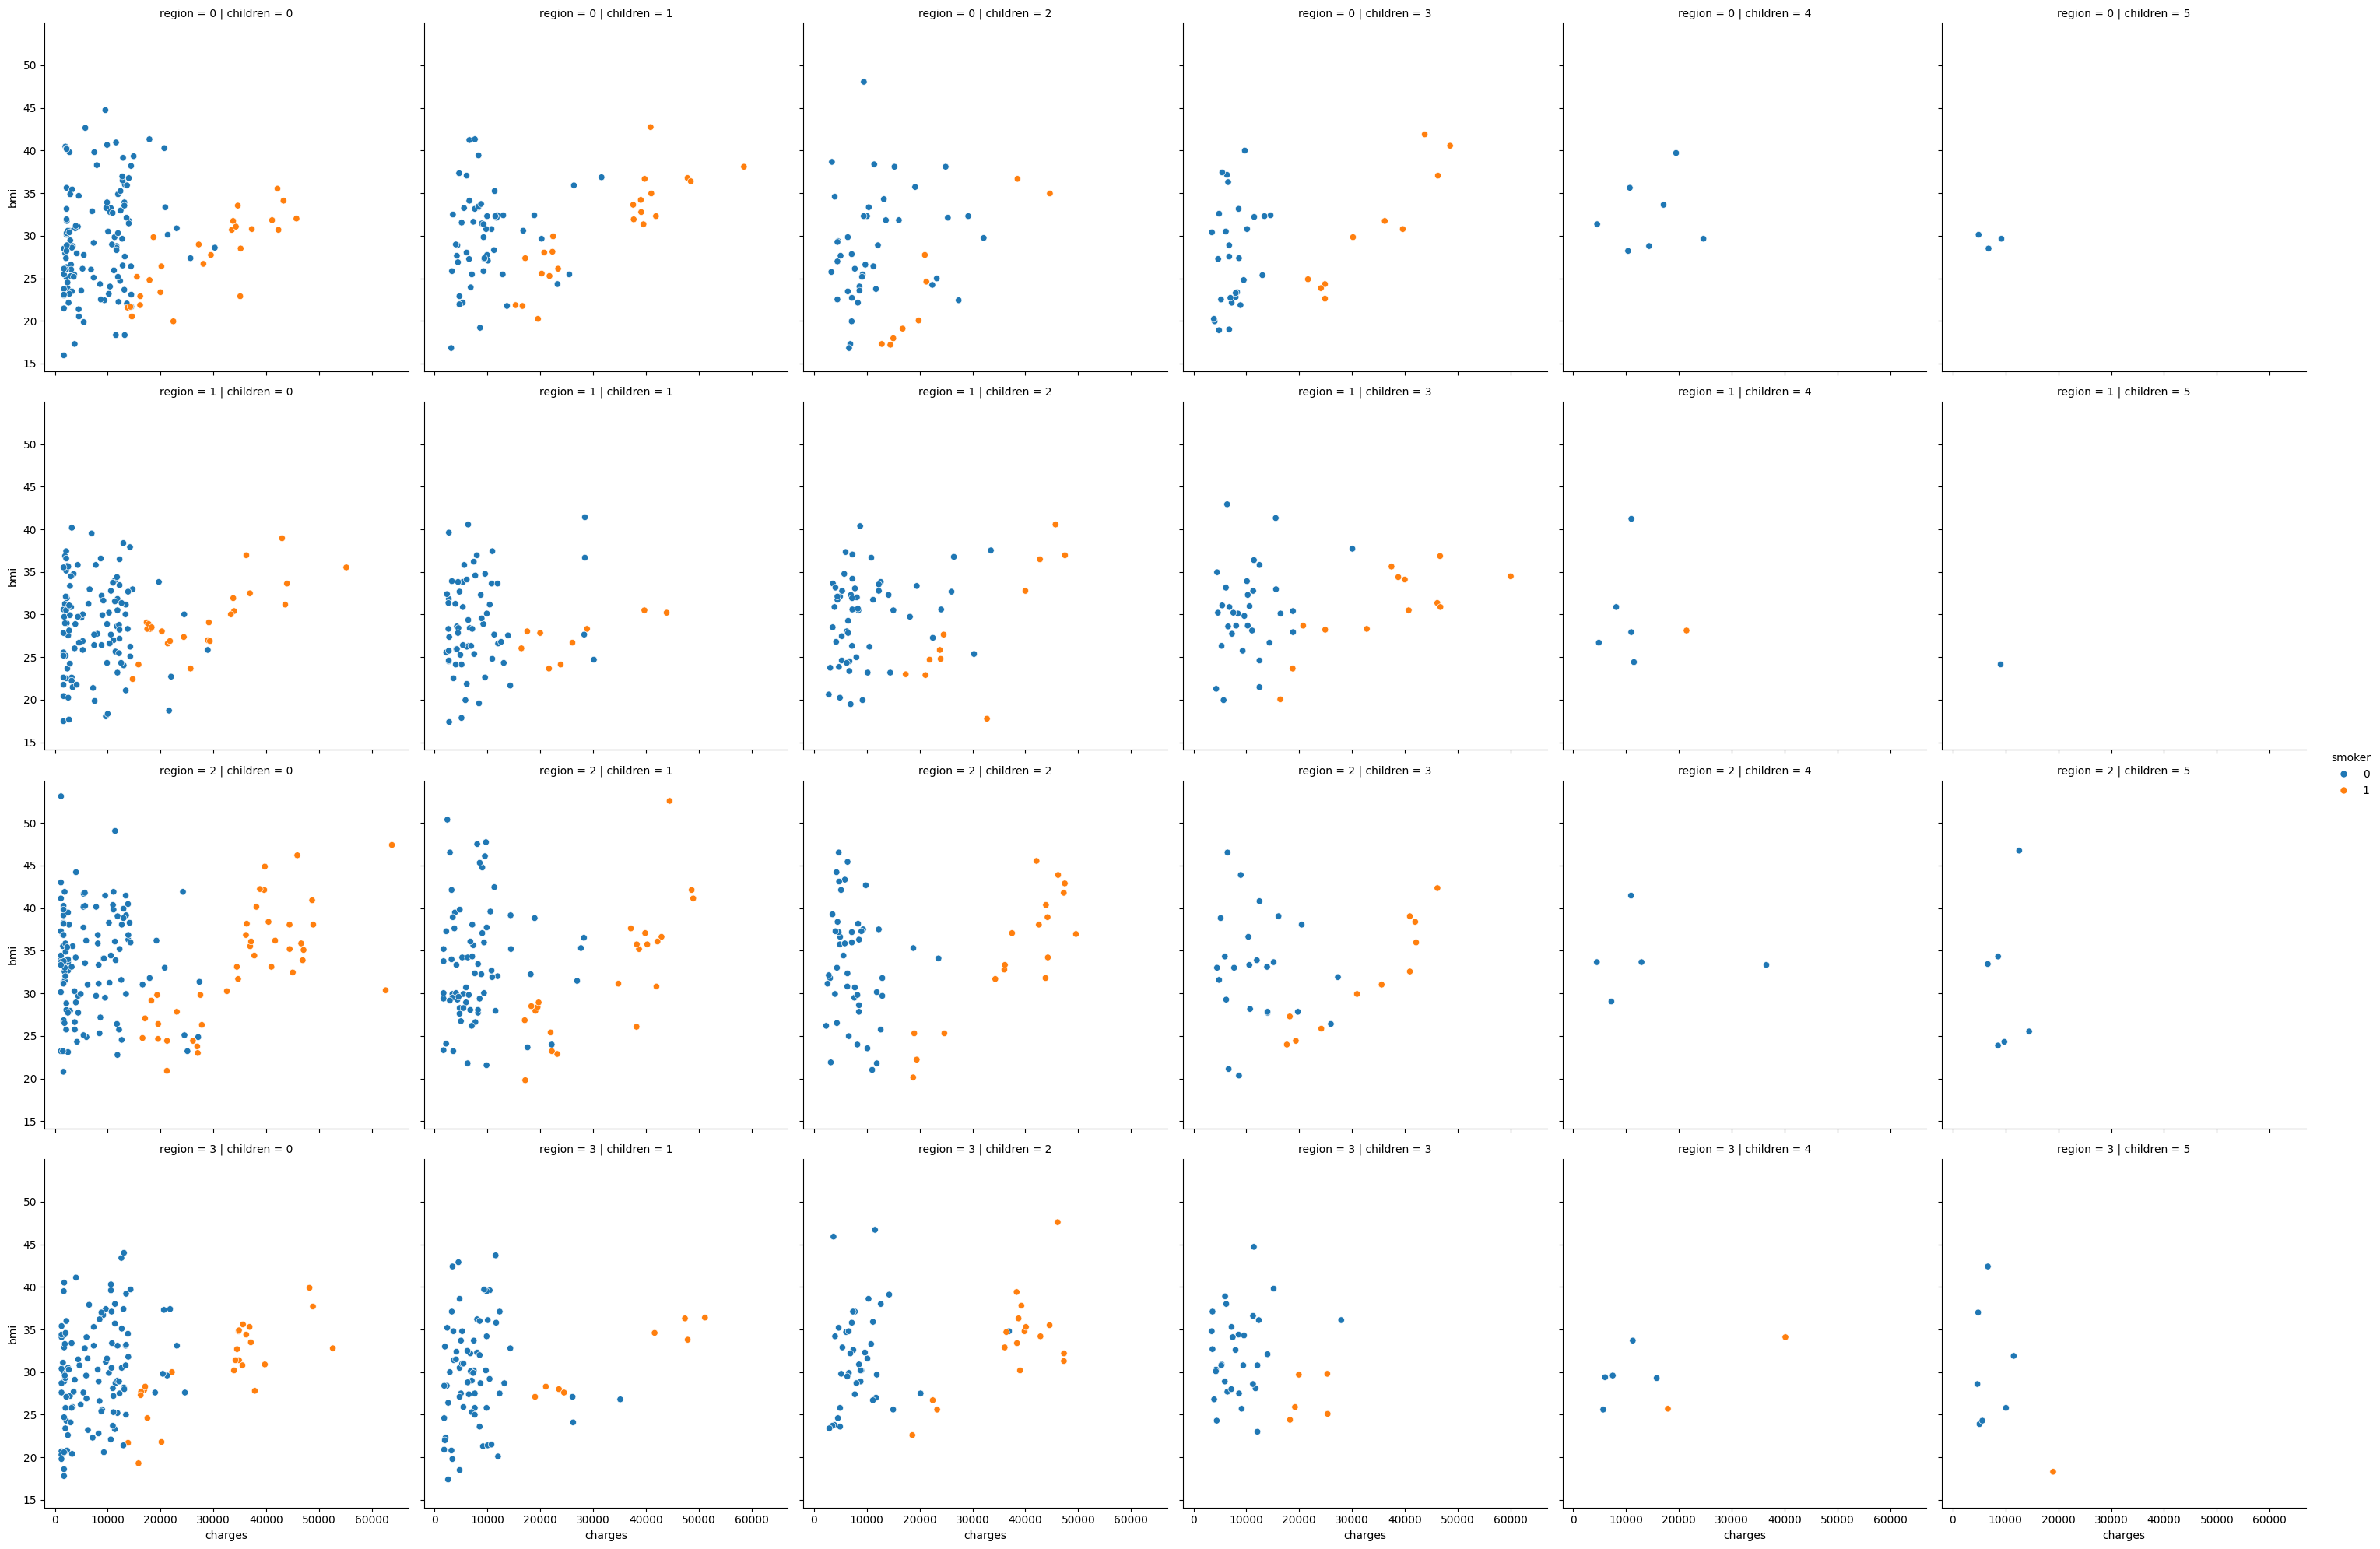

In [36]:
sns.relplot(data=df, x="charges", y="bmi", hue="smoker", col="children", row="region")

#Bivariate - Categorical Vs Numerical

In [37]:

def bivariate_cat_num(df, cat_col, num_col):
    """
    Draws both a box plot and a bar plot for bivariate analysis
    between a categorical and a numerical column.

    Parameters:
    - df: DataFrame
    - cat_col: Name of the categorical column (str)
    - num_col: Name of the numerical column (str)
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Box Plot
    sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
    axes[0].set_title(f'Box Plot of {num_col} by {cat_col}')
    axes[0].set_xlabel(cat_col)
    axes[0].set_ylabel(num_col)
    axes[0].tick_params(axis='x', rotation=45)

    # Bar Plot
    sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])
    axes[1].set_title(f'Bar Plot (Mean) of {num_col} by {cat_col}')
    axes[1].set_xlabel(cat_col)
    axes[1].set_ylabel(f'Mean {num_col}')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

<ipython-input-37-e1953f97ab58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
<ipython-input-37-e1953f97ab58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])


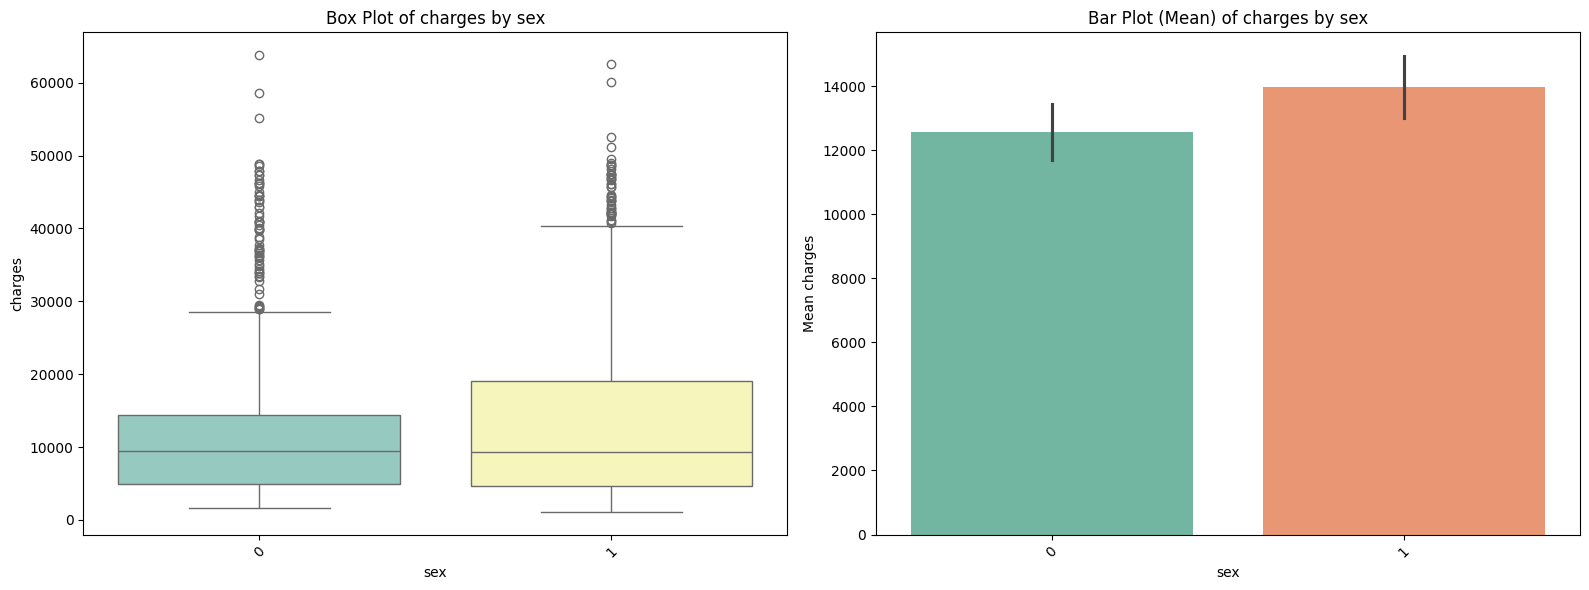

In [38]:
bivariate_cat_num(df, 'sex', 'charges')


<ipython-input-37-e1953f97ab58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
<ipython-input-37-e1953f97ab58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])


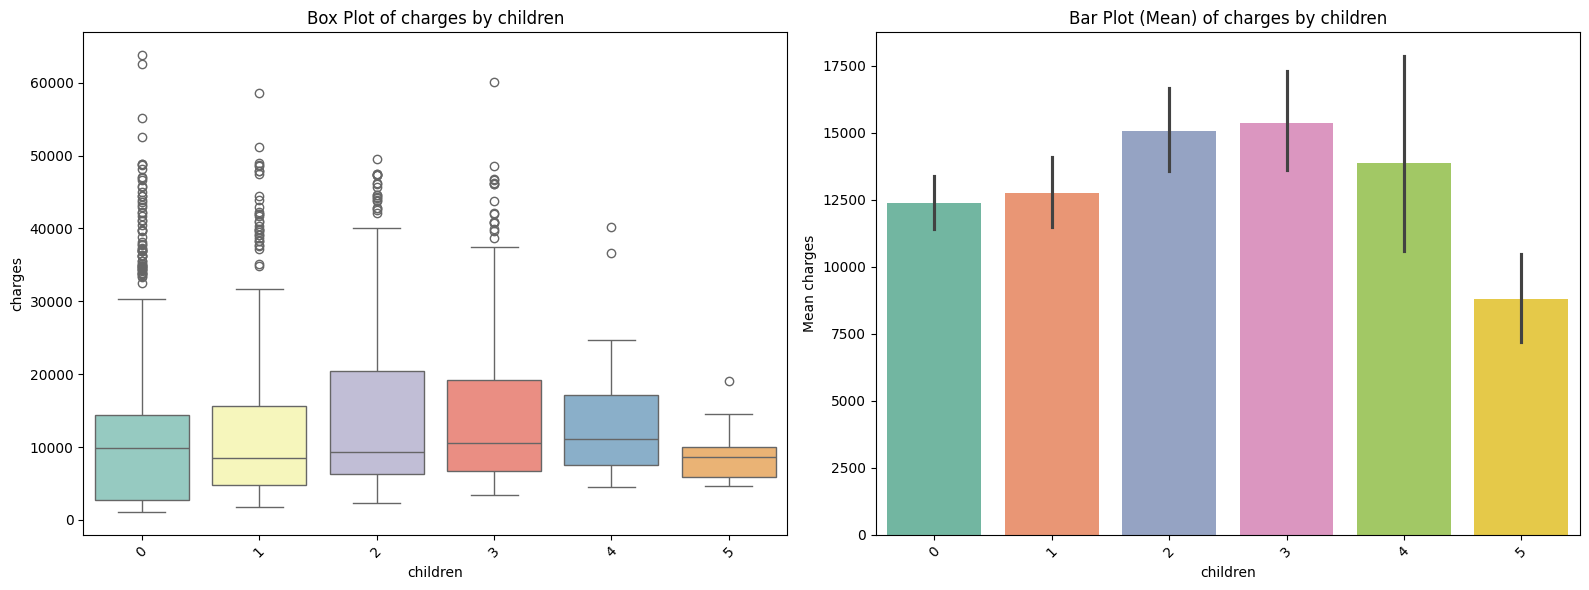

In [39]:
bivariate_cat_num(df, 'children', 'charges')


In [40]:
df['children'].value_counts(normalize=True) * 100

children
0    42.857143
1    24.233358
2    17.950636
3    11.742708
4     1.869858
5     1.346298
Name: proportion, dtype: float64

* very few instances in the data for 3 and 3+ children
* no of children is directly proportional to charges

<ipython-input-37-e1953f97ab58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
<ipython-input-37-e1953f97ab58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])


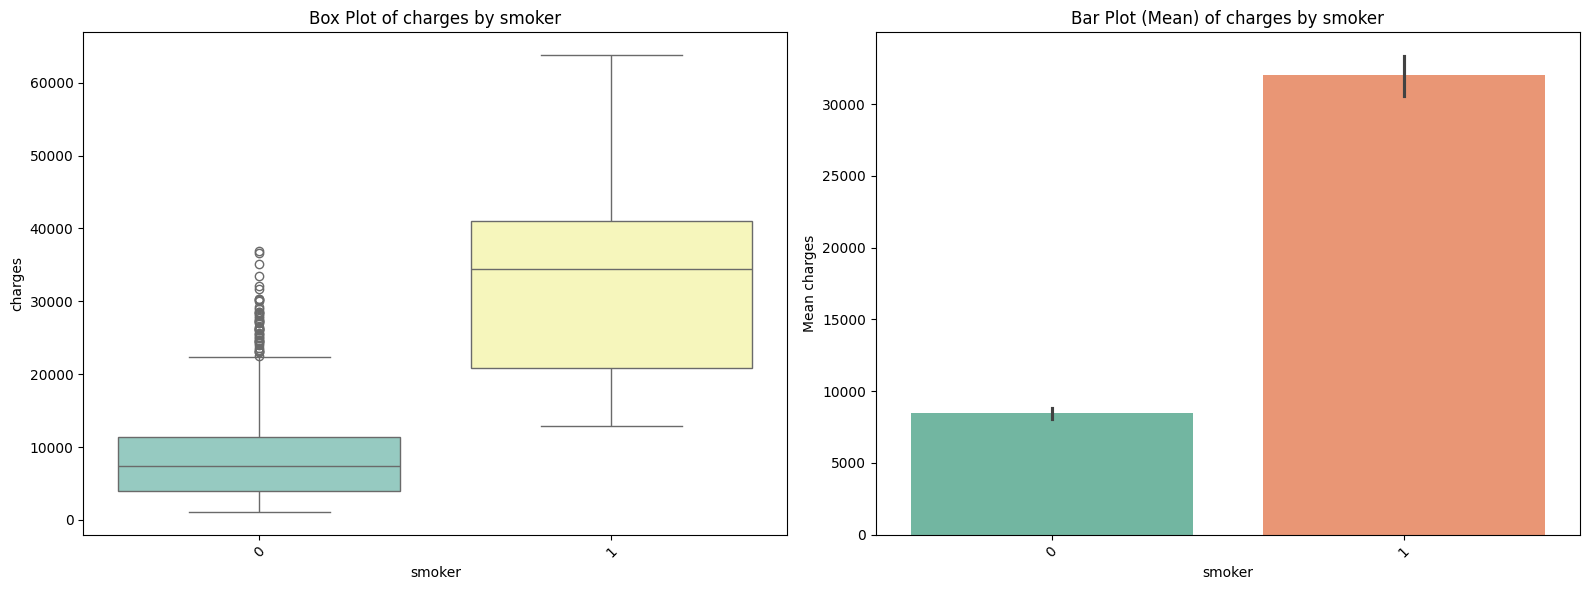

In [41]:
bivariate_cat_num(df, 'smoker', 'charges')


<ipython-input-37-e1953f97ab58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
<ipython-input-37-e1953f97ab58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])


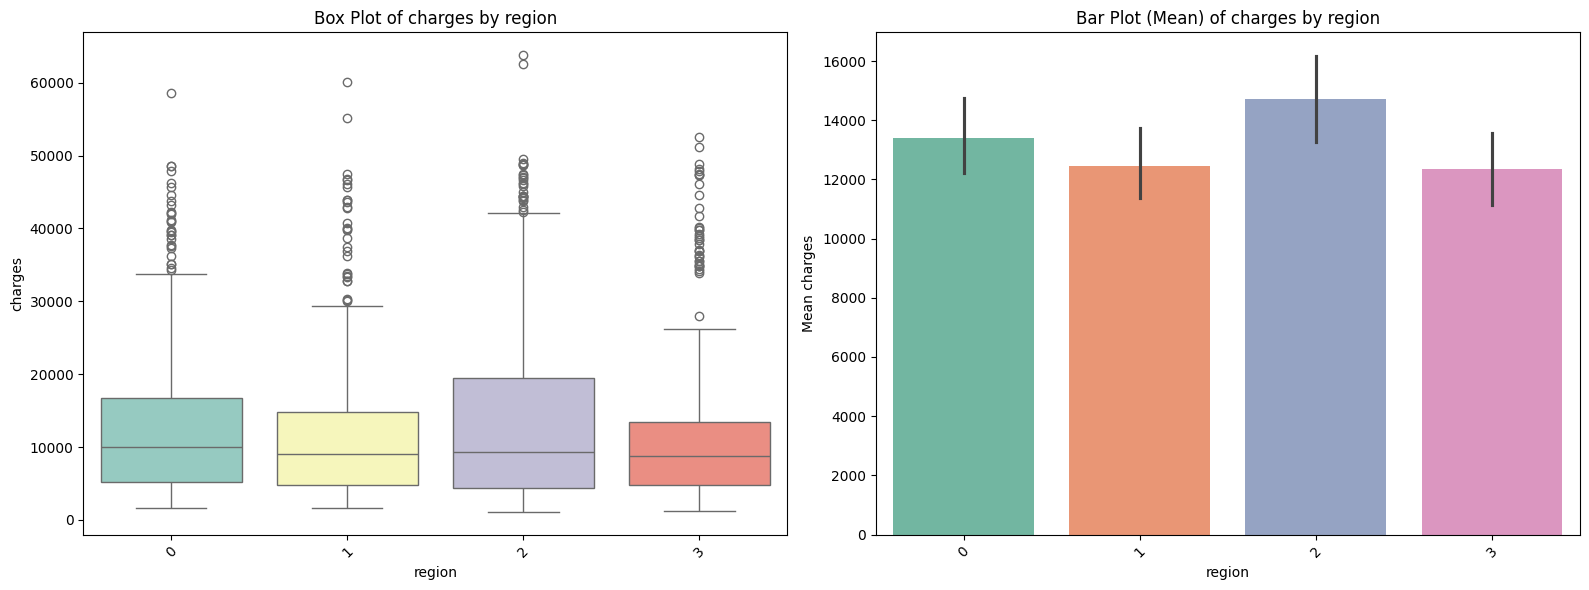

In [42]:
bivariate_cat_num(df, 'region', 'charges')


In [43]:
df['region'].value_counts(normalize=True)*100

region
2    27.225131
3    24.308153
1    24.233358
0    24.233358
Name: proportion, dtype: float64

* Even though the data is balanced across regions, there are visible differences in the mean and distribution of charges, suggesting region might be a meaningful feature to consider in modeling or analysis.

* Data is perfectly balanced for all regions:

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

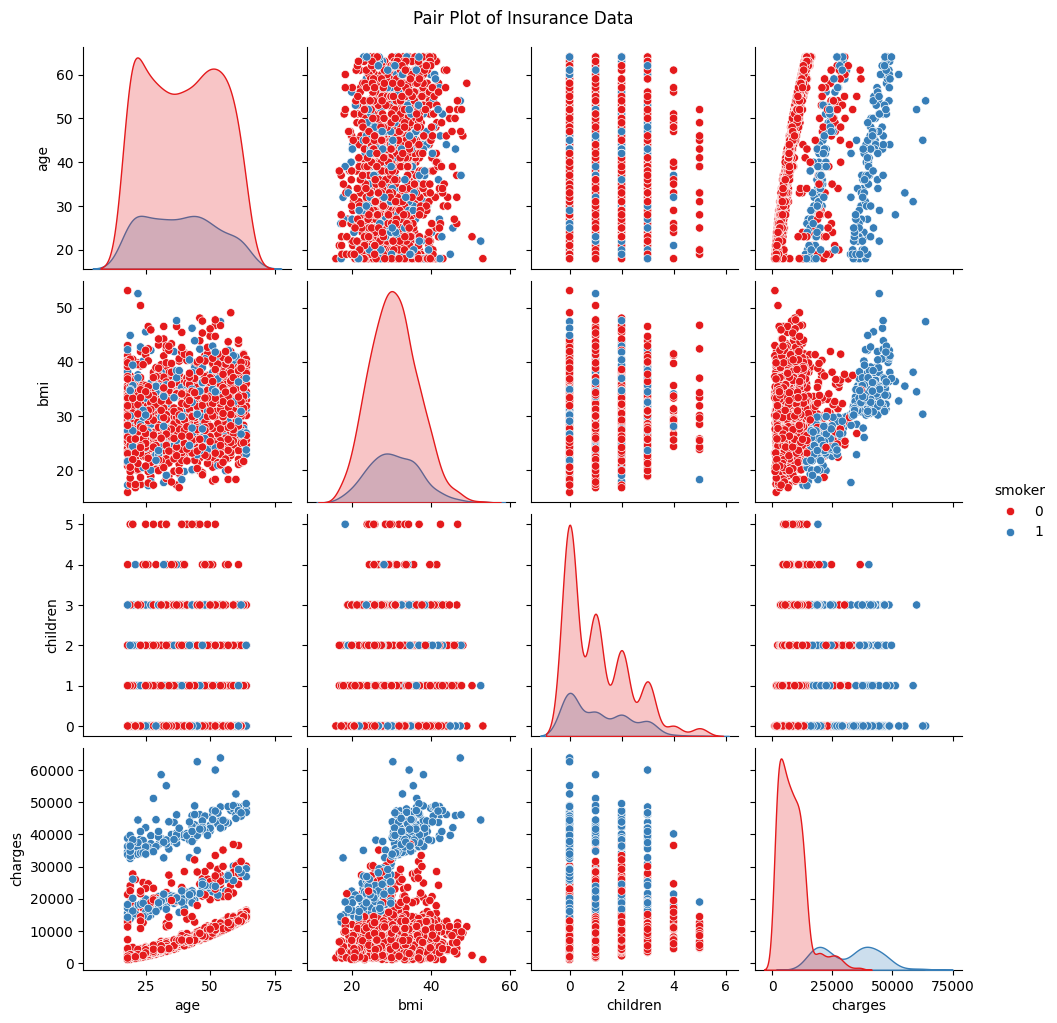

In [44]:
# Load the dataset (assuming you've already loaded it as 'df')
# Select only numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Draw pairplot with hue based on a categorical feature (e.g., 'smoker')
sns.pairplot(df[num_cols + ['smoker']], hue='smoker', palette='Set1')
plt.suptitle('Pair Plot of Insurance Data', y=1.02)
plt.show()

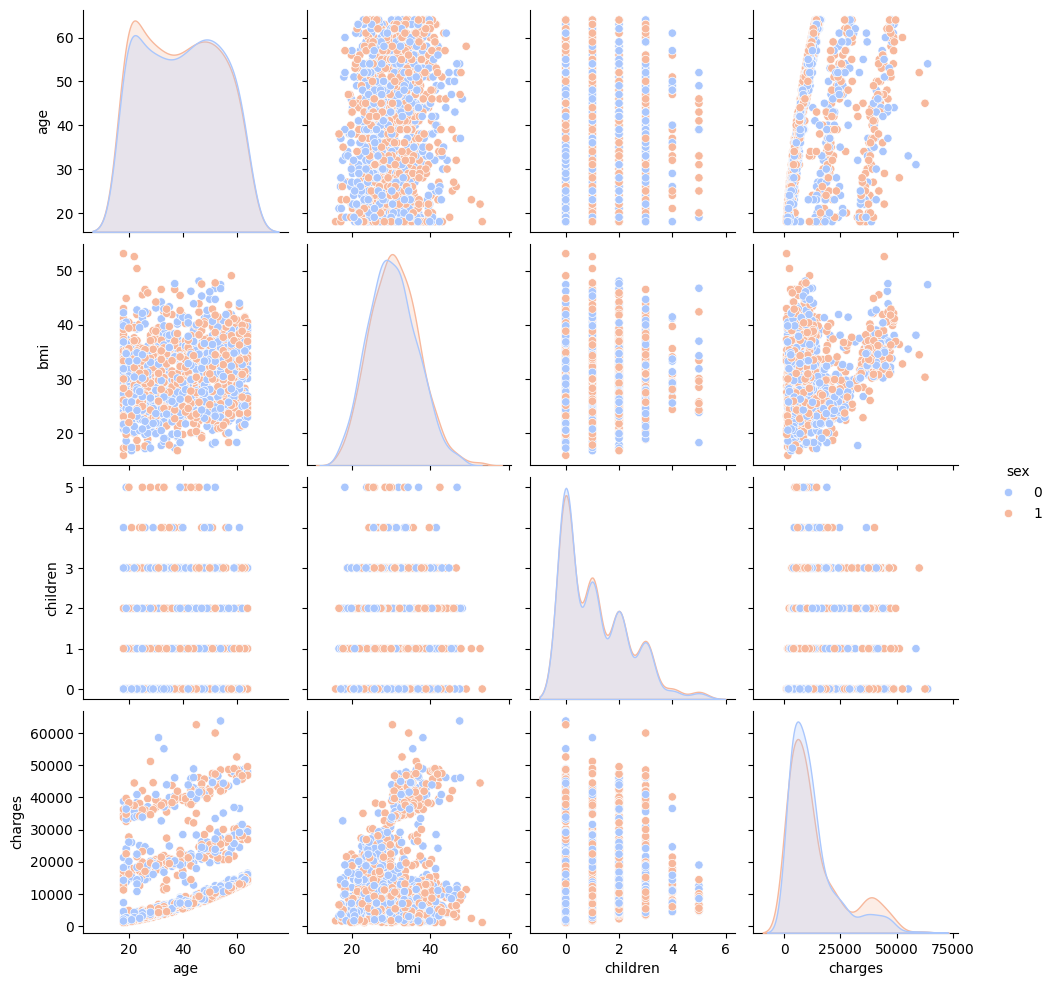

In [45]:
sns.pairplot(df[num_cols + ['sex']], hue='sex', palette='coolwarm')


### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

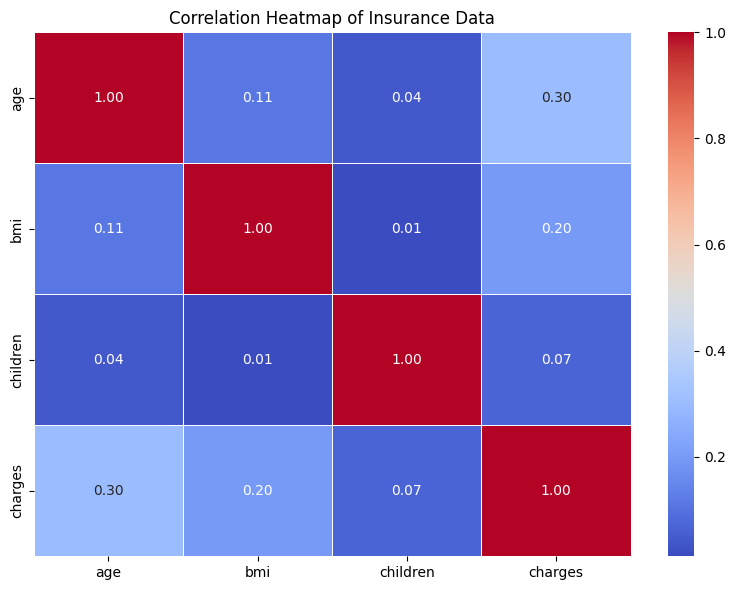

In [46]:
# Select only numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Insurance Data")
plt.tight_layout()
plt.show()

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [48]:
df.region

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1337, dtype: int64

In [49]:
# X_train

In [50]:
X = df.drop(['charges'], axis = 1)
y = df.charges

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)


### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [51]:
model = LinearRegression().fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)



### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [52]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [53]:

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Adjusted R-squared for test set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))



# Adjusted R-squared for test set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))


In [54]:

# ====================  Training Metrics ====================
print("\n" + "="*60)
print(" TRAINING METRICS".center(60))
print("="*60)
print(f" Score:                     {train_score:.4f}")
print(f" Mean Squared Error (MSE):  {mse_train:.4f}")
print(f" Mean Absolute Error (MAE): {mae_train:.4f}")
print(f" Root Mean Squared Error:   {rmse_train:.4f}")
print(f" R-squared (R²):            {r2_train:.4f}")
print(f" Adjusted R-squared:        {adjusted_r2_train:.4f}")

# ====================  Testing Metrics =====================
print("\n" + "="*60)
print(" TESTING METRICS".center(60))
print("="*60)
print(f" Score:                     {test_score:.4f}")
print(f" Mean Squared Error (MSE):  {mse_test:.4f}")
print(f" Mean Absolute Error (MAE): {mae_test:.4f}")
print(f" Root Mean Squared Error:   {rmse_test:.4f}")
print(f" R-squared (R²):            {r2_test:.4f}")
print(f" Adjusted R-squared:        {adjusted_r2_test:.4f}")
print("="*60 + "\n")




                      TRAINING METRICS                      
 Score:                     0.7518
 Mean Squared Error (MSE):  35259840.9490
 Mean Absolute Error (MAE): 3983.7557
 Root Mean Squared Error:   5937.9997
 R-squared (R²):            0.7518
 Adjusted R-squared:        0.7503

                       TESTING METRICS                      
 Score:                     0.7438
 Mean Squared Error (MSE):  40864653.7196
 Mean Absolute Error (MAE): 4376.9078
 Root Mean Squared Error:   6392.5467
 R-squared (R²):            0.7438
 Adjusted R-squared:        0.7392



### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---


---

### Model Evaluation Summary

The regression model demonstrates strong and consistent performance across training and testing datasets:

- **R² Score:**  
  - Training: 0.7504  
  - Testing: 0.7437  
  - The model explains approximately 75% of the variance in the target variable, indicating a good fit with minimal overfitting.

- **Root Mean Squared Error (RMSE):**  
  - Training: ₹5,954  
  - Testing: ₹6,394  
  - On average, predictions are off by about ₹6,000, which is reasonable for the problem context.

- **Mean Absolute Error (MAE):**  
  - Training: ₹3,991  
  - Testing: ₹4,365  
  - The average error per prediction remains relatively low on both datasets.

- **Adjusted R²:**  
  - Training: 0.7491  
  - Testing: 0.7398  
  - Most of the features are contributing effectively to the model without overfitting.

---

### Conclusion:
The model is performing well and generalizes effectively to unseen data. The errors are within acceptable limits, and the consistency between training and testing metrics suggests it is ready for deployment or further optimization if needed.



## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

In [55]:
# Charges are affected by smoker and children status In the insurance dataset, charges is often driven heavily by whether someone is a smoker or not, and how many children they have.

# Non-smokers tend to have relatively lower charges.

# Smokers have drastically higher charges (even at similar ages or BMIs).

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

In [56]:
# we can try polynomial regression for better accuracy as linear regression might not be able to capture non-linear relationships

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 50**

---